#**PRAKTIKUM MANDIRI 9 MACHINE LEARNING (NAIVE BAYES)**

Nama : Imelda Wahyuni

Nim : 0110222042

Sesi : Pagi

#**Penjelasan Dataset**

Dataset Breast Cancer adalah dataset yang berisi data hasil pengukuran karakteristik sel tumor payudara untuk menentukan apakah tumor tersebut ganas (Malignant) atau jinak (Benign). Dataset ini terdiri dari 569 baris dan 32 kolom yang berisi berbagai fitur numerik seperti radius, tekstur, perimeter, area, smoothness, concavity, dan pengukuran lainnya yang digunakan sebagai dasar dalam proses klasifikasi.

#**1. Import Library**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Kode di atas berfungsi untuk memanggil library-library yang dibutuhkan dalam proses analisis data dan membangun model Naive Bayes.

Library yang di-import digunakan untuk:

- Pandas & NumPy → membaca dan mengolah data

- Matplotlib & Seaborn → membuat visualisasi/grafik

- train_test_split & cross_val_score → membagi dataset dan melakukan evaluasi model

- StandardScaler → menstandarisasi data

- GaussianNB → membuat model klasifikasi Naive Bayes

- accuracy_score, confusion_matrix, classification_report → mengevaluasi hasil prediksi

#**2. Loading Dataset**

**- Menghubungkan ke Drive**

Menghubungkan drive dengan colab untuk mempermudah dalam menganalisis data.

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**- Membaca dataset**

Selanjutnya, kode menggunakan library Pandas untuk membaca data dari file. Variabel path berisi lokasi folder di Google Drive tempat file Cancer Dataset.csv disimpan. Lalu, fungsi pd.read_csv() dipakai untuk membaca file CSV tersebut dan menyimpannya ke dalam DataFrame, sehingga datanya bisa diproses lebih lanjut.

In [6]:
# Membaca file csv menggunakan pandas
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum09/data/Cancer Dataset.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**- Melihat 5 data teratas**

Melihat 5 baris teratas dari dataset cancer.

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**- Melihat 5 data terbawah**

Melihat 5 baris teratas dari dataset cancer.

In [8]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


**- Melihat baris dan kolom**

In [9]:
df.shape

(569, 33)

Terdapat 569 baris dan 33 kolom dari dataset cancer

**- Melihat informasi dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Terdapat 3 type dataet dari 33 kolom : float64(31), int64(1) dan object(1)

**- Melihat statistik Deskriptif**

In [11]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Hasil df.describe() menunjukkan ringkasan statistik dari seluruh kolom numerik pada dataset cancer. Dari output tersebut terlihat bahwa:
- Setiap kolom memiliki 569 data (count), artinya tidak ada missing value untuk fitur numerik.

- Nilai mean, min, max, dan quartile menunjukkan rentang ukuran karakteristik sel (seperti radius, texture, perimeter, area, dll.) yang berbeda-beda.

- Kolom “Unnamed: 32” memiliki count = 0, artinya tidak berisi data sama sekali.

- Secara umum, tabel ini membantu melihat bagaimana penyebaran nilai tiap fitur, misalnya area_worst yang memiliki rentang sangat besar dari 185 hingga lebih dari 4000.

#**3. Preprocessing Data**

**- Mengecek Missing Value**

In [12]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Terdapat nilai missing value pada kolom Unnamed

**- Menghapus kolom**

Menghapus kolom Unnamed

In [13]:
# Drop kolom Unnamed
df = df.drop(columns=['Unnamed: 32'])

**- Mengecek kembali missing value**

In [14]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


**- Melihat nilai unik**

In [15]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

#**4. Encoding Fitur Kategorikal**

In [16]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

Kode di atas yaitu untuk mengubah nilai diagnosis dari huruf menjadi angka, yaitu M menjadi 1 dan B menjadi 0, agar dapat digunakan dalam proses klasifikasi.

#**5. Pisahkan Fitur (X) dan Target (Y)**

In [17]:
# Pisahkan fitur dan target
X = df.drop(columns=['diagnosis'])
Y = df['diagnosis']

Kode di atas yaitu untuk memisahkan data menjadi fitur (X) yang berisi seluruh kolom kecuali diagnosis, dan target (Y) yang berisi nilai diagnosis yang akan diprediksi.

In [18]:
# Cek apakah ada baris
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (569, 31)
Y shape: (569,)


Kode diatas digunakan untuk menampilkan ukuran (shape) dari X dan Y, guna memastikan bahwa jumlah baris pada fitur dan target sesuai dan data siap digunakan untuk proses selanjutnya.


#**6. Splitting Data**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

Kode di atas yaitu untuk membagi dataset menjadi data training dan testing, dengan 80% data digunakan untuk melatih model dan 20% untuk menguji model, serta memastikan proporsi kelas tetap seimbang melalui stratify.

#**7. Scaling Data**

In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Kode di atas yaitu untuk menstandarisasi data fitur agar memiliki skala yang sama, menghasilkan X_train_scaled dan X_test_scaled yang digunakan sebagai input model.

#**8. Training Model Naive Bayes**

In [21]:
nb = GaussianNB()
nb.fit(X_train_scaled, Y_train)

GaussianNB()

Kode di atas untuk membuat model Naive Bayes menggunakan GaussianNB, kemudian melatih model tersebut menggunakan data training yang telah distandarisasi.

#**9. Prediksi & Akurasi**

X_test_scaled → data fitur testing yang sudah distandarisasi

Y_test → label asli untuk data testing

nb → model Naive Bayes yang sudah dilatih

In [22]:
y_pred = nb.predict(X_test_scaled)

train_acc = nb.score(X_train_scaled, Y_train)
test_acc = accuracy_score(Y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9428571428571428
Testing Accuracy: 0.9210526315789473


- Training Accuracy = 94.28%
Model mampu mempelajari data training dengan sangat baik.Artinya, sekitar 94% data latih berhasil diprediksi dengan benar oleh model.

- Testing Accuracy = 92.10%
Ketika diuji pada data yang belum pernah dilihat sebelumnya, model tetap menghasilkan prediksi yang baik. Artinya, sekitar 92% data uji diprediksi dengan benar

Model Naive Bayes memiliki performa yang baik karena akurasi training dan testing berada di atas 90%. Selisihnya kecil, sehingga model tidak mengalami overfitting dan mampu melakukan generalisasi dengan baik.

#**10. Confusion Matrix**

Y_test → label sebenarnya (actual)

y_pred → hasil prediksi model

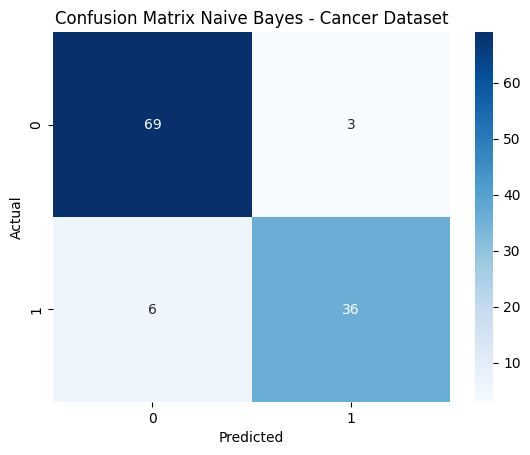

In [23]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes - Cancer Dataset")
plt.show()

Confusion matrix menunjukkan bahwa model bekerja cukup baik dengan mayoritas prediksi benar. Dari total data uji, model berhasil mengenali 69 kasus jinak dan 36 kasus ganas dengan tepat, sementara kesalahan prediksi relatif kecil (3 salah prediksi jinak → ganas dan 6 salah prediksi ganas → jinak).


#**11. Classification Report**

In [24]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Model Naive Bayes memiliki performa yang baik dengan akurasi 92%. Model sangat kuat dalam mengenali tumor jinak (recall 96%) dan cukup baik dalam mendeteksi tumor ganas (recall 86%). Secara keseluruhan, precision, recall, dan f1-score berada di atas 0.89, menandakan model bekerja stabil dan efektif.

#**12. Cross Validation**

nb → model Naive Bayes

X, Y → fitur lengkap & label

cv=5 → data dibagi menjadi 5 lipatan (5-fold cross-validation)

In [25]:
cv_scores = cross_val_score(nb, X, Y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross Validation Scores: [0.60526316 0.62280702 0.63157895 0.61403509 0.62831858]
Mean Accuracy: 0.6204005589194225
Standard Deviation: 0.00962395622503955


Cross-validation menghasilkan akurasi rata-rata sekitar 62% dengan variasi sangat kecil. Ini menunjukkan model konsisten tetapi kurang optimal jika diuji pada berbagai pembagian data. Dibandingkan akurasi testing sebesar 92%, cross-validation mengindikasikan model bisa mengalami penurunan performa pada kondisi data tertentu.

**Kesimpulan**

Model Gaussian Naive Bayes berhasil diterapkan untuk melakukan klasifikasi tumor pada dataset cancer. Berdasarkan hasil pengujian, model menunjukkan performa yang cukup baik dengan akurasi training sebesar 94% dan akurasi testing sebesar 92%, yang menandakan bahwa model mampu mempelajari pola data dengan baik dan tetap stabil saat menghadapi data baru. Pada confusion matrix, model mampu mengenali mayoritas kasus tumor jinak maupun ganas dengan jumlah kesalahan prediksi yang relatif kecil. Hasil classification report juga memperlihatkan nilai precision, recall, dan f1-score yang tinggi pada kedua kelas, sehingga performa model dapat dikatakan konsisten. Meskipun demikian, hasil cross-validation menunjukkan rata-rata akurasi sebesar 62%, yang mengindikasikan bahwa performa model dapat menurun ketika diuji pada pembagian data yang berbeda. Secara keseluruhan, model Naive Bayes tetap memberikan hasil yang baik sebagai model dasar (baseline) untuk klasifikasi tumor, namun evaluasi menggunakan algoritma lain dapat dilakukan untuk memperoleh performa yang lebih stabil.